In [ ]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import fashion_mnist
from keras.layers import Add, Dense, Activation, BatchNormalization, Conv2D
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.initializers import glorot_uniform
%matplotlib inline

In [ ]:
model_type = 'vgg16'

In [ ]:
#Defining Variables

#Data set information
DATASET = 'fashion_mnist'
num_classes = 2
input_shape=(28,28,1)
epochs = 200
lrate = 0.01
decay = lrate/epochs
batch_size = 32
seed = 7
np.random.seed(seed)

validate_dir = os.path.join("data","test")
train_dir = os.path.join("data","train")

# Prepare model model saving directory.
model_home_dir = os.path.join(os.getcwd(), 'CNN_TASK_ODED',"model_type")
save_dir = os.path.join(model_home_dir, 'saved_models')

model_name = DATASET+'_'+'%s_model.{epoch:03d}.h5' % model_type

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
print("Model Type: ",model_type)
print("Model File: ",filepath)

Model Type:  vgg16
Model File:  /content/CNN_TASK_ODED/model_type/saved_models/fashion_mnist_vgg16_model.{epoch:03d}.h5


In [ ]:
import numpy

(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape, X_train.shape[1:],X_train.dtype

class_7_index = np.where(y_train.reshape(-1) == 7)
X_train_class_7 = X_train[class_7_index]
y_train_class_7 = y_train[class_7_index]


class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot']

# print("------------------y_train_class_7-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train_class_0[i])
#     plt.xlabel(class_names[y_train_class_0[i][0]])
# plt.show()

class_9_index = np.where(y_train.reshape(-1) == 9)
X_train_class_9 = X_train[class_9_index]
y_train_class_9 = y_train[class_9_index]

# print("------------------y_train_class_9-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train_class_9[i])
#     plt.xlabel(class_names[y_train_class_9[i][0]])
# plt.show()


X_train = np.concatenate((X_train_class_7, X_train_class_9))
y_train = np.concatenate((y_train_class_7, y_train_class_9)).reshape(-1,1)

# print("------------------concatenate train-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     j = random.randint(0,10000)
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[j])
#     plt.xlabel(class_names[y_train[j][0]])
# plt.show()

# ---------------------------------------------------------------------------

class_7_index = np.where(y_test.reshape(-1) == 7)
X_test_class_7 = X_test[class_7_index]
y_test_class_7 = y_test[class_7_index]

# print("------------------y_test_class_7-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_test_class_7[i])
#     plt.xlabel(class_names[y_test_class_7[i][0]])
# plt.show()

class_9_index = np.where(y_test.reshape(-1) == 9)
X_test_class_9 = X_test[class_9_index]
y_test_class_9 = y_test[class_9_index]


# print("------------------y_test_class_9-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_test_class_9[i])
#     plt.xlabel(class_names[y_test_class_9[i][0]])
# plt.show()


X_test = np.concatenate((X_test_class_7, X_test_class_9))
y_test = np.concatenate((y_test_class_7, y_test_class_9)).reshape(-1,1)

# print("------------------concatenate test-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     j = random.randint(0,2000) 
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_test[j])
#     plt.xlabel(class_names[y_test[j][0]])
# plt.show()

print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)


(12000, 1) (2000, 1)
(12000, 28, 28) (2000, 28, 28)


In [ ]:
y_train_class_9.shape

(6000,)

In [ ]:
y_train = np.where(y_train > 7, 9, 7)
y_test = np.where(y_test > 7, 9, 7)
class_names = ['airplane',  'bird']

print(y_train.shape, y_test.shape)

(12000, 1) (2000, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = np.concatenate((X_test, X_train))
Y = np.concatenate((y_test, y_train)).reshape(-1,1)

# X, y = shuffle(X, Y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

# print("------------------concatenate train-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     j = random.randint(0,11900)
#     plt.subplot(330 + 1 + i)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[j], cmap=plt.get_cmap('gray'))
#     # plt.xlabel(class_names[y_train[j]])
# plt.show()

# print("------------------concatenate test-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     j = random.randint(0,2100) 
#     plt.subplot(330 + 1 + i)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_test[j], cmap=plt.get_cmap('gray'))
#     # plt.xlabel(class_names[y_test[j]])
# plt.show()



(11900, 1) (2100, 1)
(11900, 28, 28) (2100, 28, 28)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

X_train_mean = np.mean(X_train)
X_train -= X_train_mean
X_test_mean = np.mean(X_test)
X_test -= X_test_mean

y_train = np_utils.to_categorical(y_train,)
y_test = np_utils.to_categorical(y_test,)
y_train = np.delete(y_train,[0,1,2,3,4,5,6,7,8],1)
y_test = np.delete(y_test,[0,1,2,3,4,5,6,7,8],1)
print(y_train.shape, y_test.shape)



(11900, 1) (2100, 1)


In [ ]:
from tensorflow.keras.layers import Dropout
def vgg16(input_shape=(32,32,3), num_classes=2):
  model = Sequential()
  model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Dropout(0.8))

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=1, activation="sigmoid"))

  return model

In [ ]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


In [ ]:
# Prepare callbacks for model saving and for learning rate adjustment.

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler,early_stopping]


In [ ]:
 model = vgg16(input_shape,num_classes)

# Compile model

# optimizer = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss= 'binary_crossentropy' , optimizer=optimizer, metrics=['accuracy'])
print("Model Summary of ",model_type)
print(model.summary())



Model Summary of  vgg16
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Score trained model.
history = model.fit(X_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_test, y_test),
      shuffle=True,
      callbacks=callbacks)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Learning rate:  0.001
Epoch 1/200
372/372 [==============================] - ETA: 0s - loss: 0.2897 - accuracy: 0.8546

372/372 [==============================] - 8s 14ms/step - loss: 0.2897 - accuracy: 0.8546 - val_loss: 0.1622 - val_accuracy: 0.9433 - lr: 0.0010
Learning rate:  0.001
Epoch 2/200
367/372 [============================>.] - ETA: 0s - loss: 0.1489 - accuracy: 0.9448

372/372 [==============================] - 4s 11ms/step - loss: 0.1491 - accuracy: 0.9445 - val_loss: 0.1440 - val_accuracy: 0.9400 - lr: 0.0010
Learning rate:  0.001
Epoch 3/200
372/372 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.9546

372/372 [==============================] - 4s 11ms/step - loss: 0.1179 - accuracy: 0.9546 - val_loss: 0.0886 - val_accuracy: 0.9695 - lr: 0.0010
Learning rate:  0.001
Epoch 4/200
372/372 [==============================] - ETA: 0s - loss: 0.1127 - accuracy: 0.9593

372/372 [==============================] - 4s 11ms/step - loss: 0.1127 - accuracy: 0.9593 - val_loss: 0.0812 - val_accuracy: 0.9757 - lr: 0.0010
Learning rate:  0.001
Epoch 5/200
370/372 [============================>.] - ETA: 0s - loss: 0.0993 - accuracy: 0.9634

372/372 [==============================] - 4s 11ms/step - loss: 0.0992 - accuracy: 0.9636 - val_loss: 0.0697 - val_accuracy: 0.9786 - lr: 0.0010
Learning rate:  0.001
Epoch 6/200
369/372 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9621

372/372 [==============================] - 4s 11ms/step - loss: 0.0983 - accuracy: 0.9624 - val_loss: 0.0864 - val_accuracy: 0.9714 - lr: 0.0010
Learning rate:  0.001
Epoch 7/200
370/372 [============================>.] - ETA: 0s - loss: 0.0885 - accuracy: 0.9671

372/372 [==============================] - 4s 11ms/step - loss: 0.0887 - accuracy: 0.9671 - val_loss: 0.0667 - val_accuracy: 0.9786 - lr: 0.0010
Learning rate:  0.001
Epoch 8/200
371/372 [============================>.] - ETA: 0s - loss: 0.0862 - accuracy: 0.9692

372/372 [==============================] - 4s 11ms/step - loss: 0.0861 - accuracy: 0.9692 - val_loss: 0.0706 - val_accuracy: 0.9729 - lr: 0.0010
Learning rate:  0.001
Epoch 9/200
371/372 [============================>.] - ETA: 0s - loss: 0.0834 - accuracy: 0.9679

372/372 [==============================] - 4s 11ms/step - loss: 0.0832 - accuracy: 0.9680 - val_loss: 0.0664 - val_accuracy: 0.9762 - lr: 0.0010
Learning rate:  0.001
Epoch 10/200
370/372 [============================>.] - ETA: 0s - loss: 0.0830 - accuracy: 0.9695

372/372 [==============================] - 4s 11ms/step - loss: 0.0829 - accuracy: 0.9695 - val_loss: 0.0678 - val_accuracy: 0.9724 - lr: 0.0010
Learning rate:  0.001
Epoch 11/200
371/372 [============================>.] - ETA: 0s - loss: 0.0847 - accuracy: 0.9680

372/372 [==============================] - 4s 11ms/step - loss: 0.0846 - accuracy: 0.9680 - val_loss: 0.0637 - val_accuracy: 0.9757 - lr: 0.0010
Learning rate:  0.001
Epoch 12/200
370/372 [============================>.] - ETA: 0s - loss: 0.0717 - accuracy: 0.9725

372/372 [==============================] - 4s 11ms/step - loss: 0.0713 - accuracy: 0.9726 - val_loss: 0.0594 - val_accuracy: 0.9786 - lr: 0.0010
Learning rate:  0.001
Epoch 13/200
370/372 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.9729

372/372 [==============================] - 4s 11ms/step - loss: 0.0745 - accuracy: 0.9729 - val_loss: 0.0582 - val_accuracy: 0.9810 - lr: 0.0010
Learning rate:  0.001
Epoch 14/200
371/372 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.9726

372/372 [==============================] - 4s 11ms/step - loss: 0.0776 - accuracy: 0.9727 - val_loss: 0.0572 - val_accuracy: 0.9795 - lr: 0.0010
Learning rate:  0.001
Epoch 15/200
370/372 [============================>.] - ETA: 0s - loss: 0.0740 - accuracy: 0.9732

372/372 [==============================] - 4s 11ms/step - loss: 0.0739 - accuracy: 0.9733 - val_loss: 0.0670 - val_accuracy: 0.9752 - lr: 0.0010
Learning rate:  0.001
Epoch 16/200
370/372 [============================>.] - ETA: 0s - loss: 0.0718 - accuracy: 0.9720

372/372 [==============================] - 4s 11ms/step - loss: 0.0721 - accuracy: 0.9719 - val_loss: 0.0669 - val_accuracy: 0.9762 - lr: 0.0010
Learning rate:  0.001
Epoch 17/200
371/372 [============================>.] - ETA: 0s - loss: 0.0766 - accuracy: 0.9710

372/372 [==============================] - 4s 11ms/step - loss: 0.0767 - accuracy: 0.9709 - val_loss: 0.0575 - val_accuracy: 0.9790 - lr: 0.0010
Learning rate:  0.001
Epoch 18/200
371/372 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9725

372/372 [==============================] - 4s 11ms/step - loss: 0.0739 - accuracy: 0.9726 - val_loss: 0.0627 - val_accuracy: 0.9790 - lr: 0.0010
Learning rate:  0.001
Epoch 19/200
371/372 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9727

66/66 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 0.9795
Test loss: 0.05719698220491409
Test accuracy: 0.9795238375663757


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


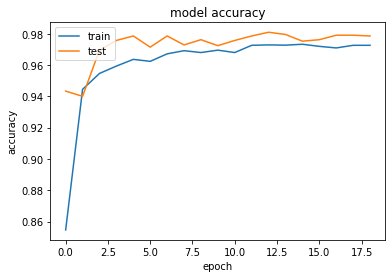

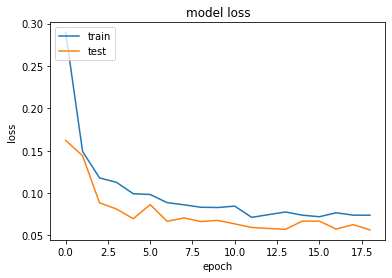

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

66/66 [==============================] - 0s 3ms/step


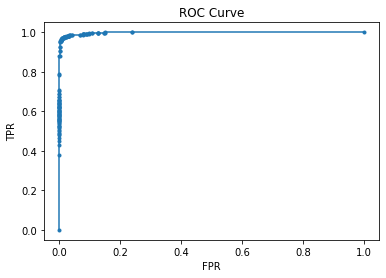

0.9978967425823428


In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.title('ROC Curve')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

print(auc_keras)


66/66 [==============================] - 0s 3ms/step


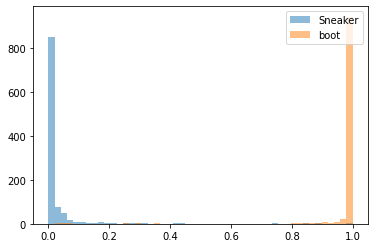

In [ ]:
from matplotlib import pyplot
predict_x=model.predict(X_test) 

Sneaker_index = np.where(y_test.reshape(-1) == 0.)
Sneaker = predict_x[Sneaker_index]

boot_index = np.where(y_test.reshape(-1) == 1.)
boot = predict_x[boot_index]



bins = np.linspace(0, 1, 50)

pyplot.hist(Sneaker, bins, alpha=0.5, label='Sneaker')
pyplot.hist(boot, bins, alpha=0.5, label='boot')
pyplot.legend(loc='upper right')
pyplot.show()